# DM-26380: Monthly August 2020 ap_pipe HiTS2015 reprocessing

### The HiTS dataset and AP Pipeline
I ran ap_pipe.py via slurm on the HiTS2015 dataset. I used coadds built in Jan 2020 from HiTS2014 as templates. The dataset consists of 3 fields (pointings), each visited 28 times, all in _g_ band. Two of the fields have a small spatial overlap.

Running ap_pipe saves information about DIA Objects and DIA Sources in an Alert Production Database (APDB), which I use for the majority of this notebook. "Filtered" or "Good" means DIA Sources with one or more of the "bad," "saturated center," or "suspect" pixel flags have been excluded.

I ran this August 2020 rerun using the weekly build `w_2020_33`. The APDB used is sqlite.

### Results are identical to July
Nothing has changed, hurrah! (OK technically there is 1 more "good" DIA Object than in July, which makes this rerun identical to June.)

In [1]:
%matplotlib notebook

import sys
import numpy as np
import matplotlib.pyplot as plt
import importlib
import pandas as pd
#import psycopg2

from astropy.coordinates import SkyCoord
import astropy.units as u

import lsst.daf.persistence as dafPersist

In [2]:
sys.path.append('/project/mrawls/ap_pipe-notebooks/')
import diaObjectAnalysis as doa
import apdbPlots as pla

In [ ]:
# Only if you change anything in the code imported above
importlib.reload(doa)
importlib.reload(pla)

In [4]:
repo = '/project/mrawls/hits2015/rerun/cw_2020_08'

In [5]:
objTable, srcTable, goodObj, goodSrc = pla.loadTables(repo)

<IPython.core.display.Javascript object>


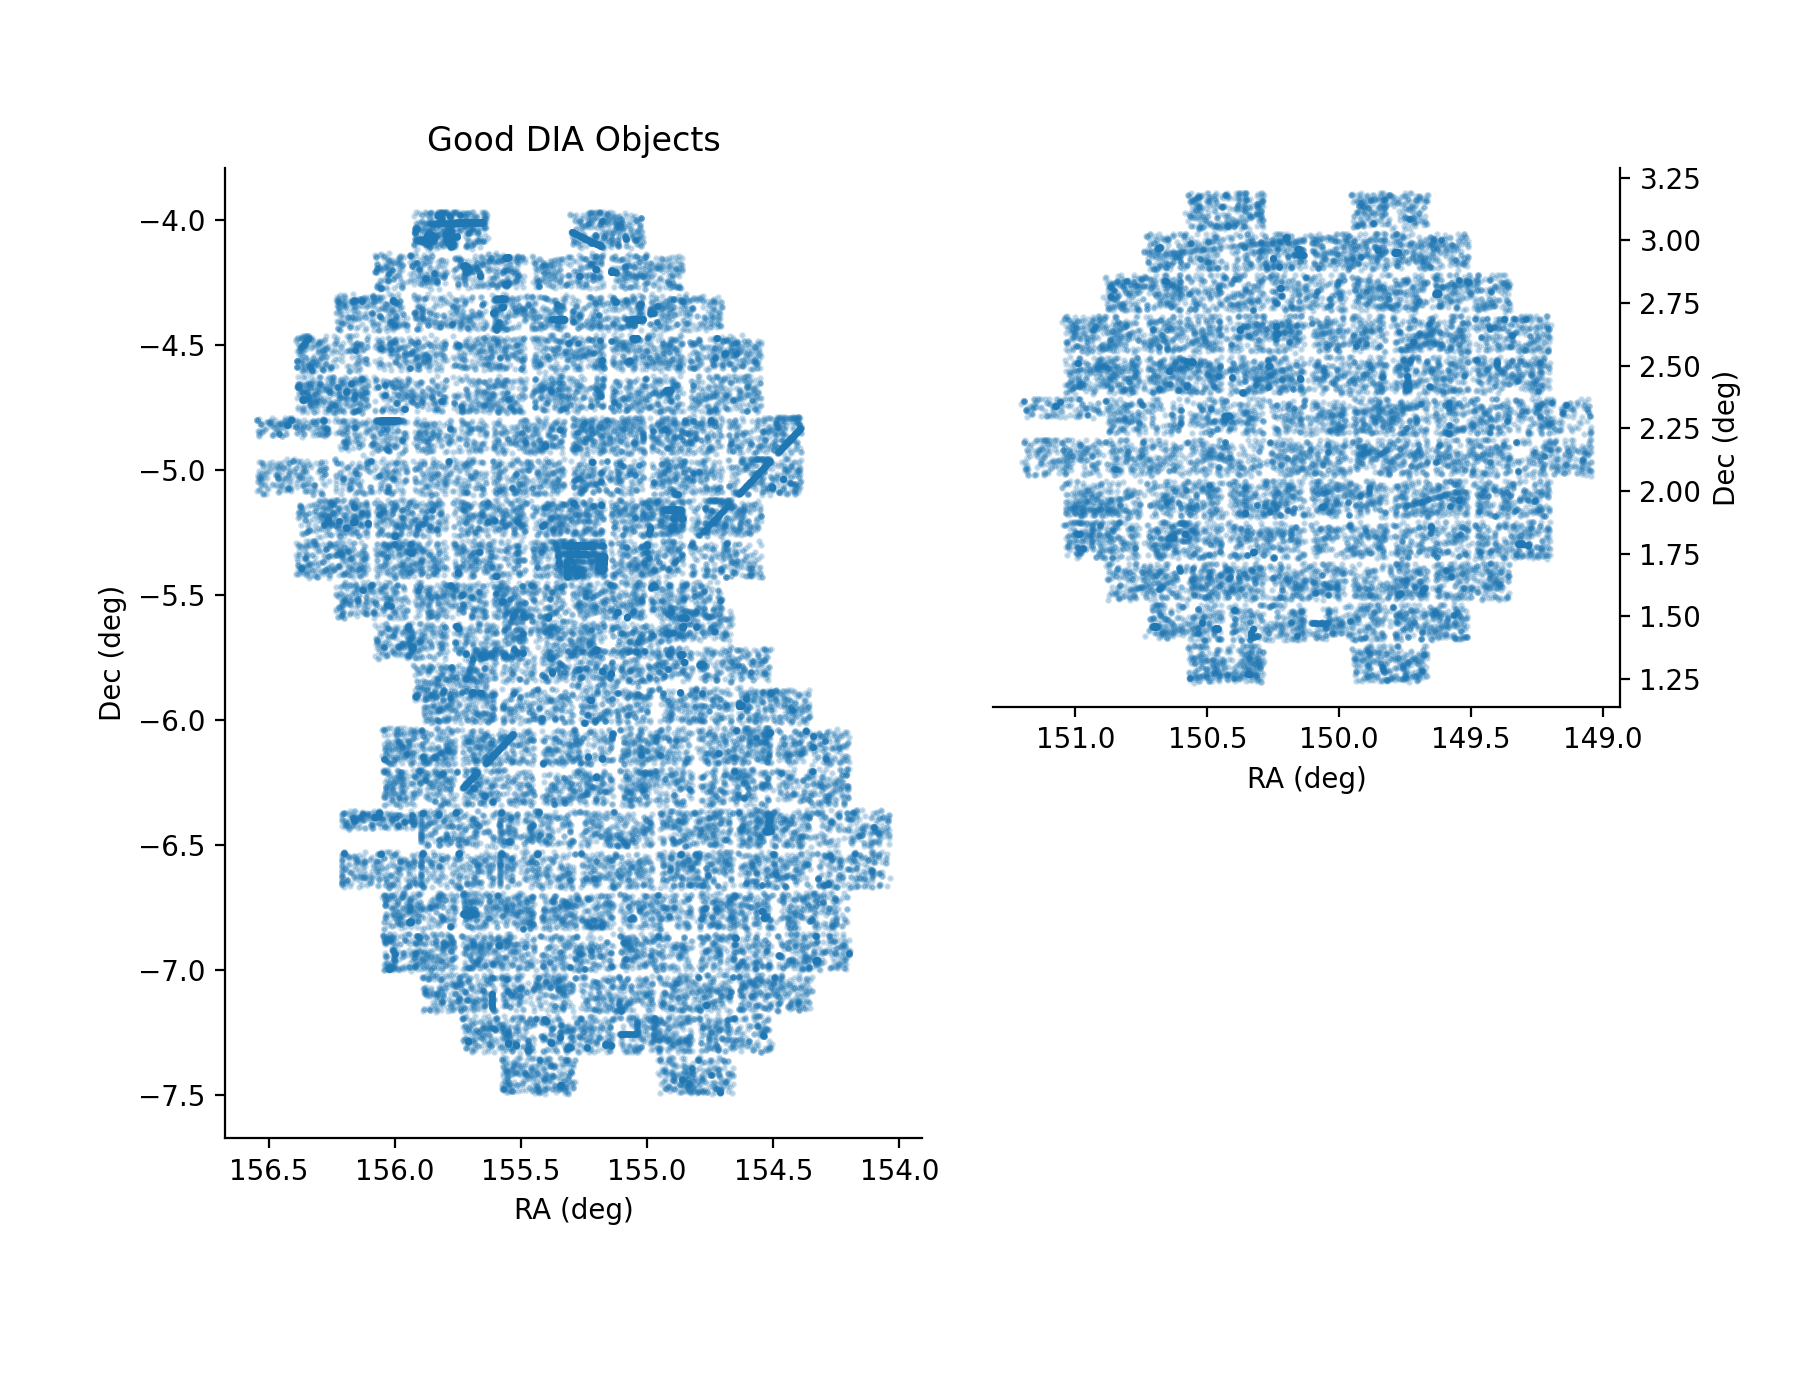

In [6]:
hitsPlot = pla.plotHitsSourcesOnSky(goodObj, title='Good DIA Objects')

<IPython.core.display.Javascript object>


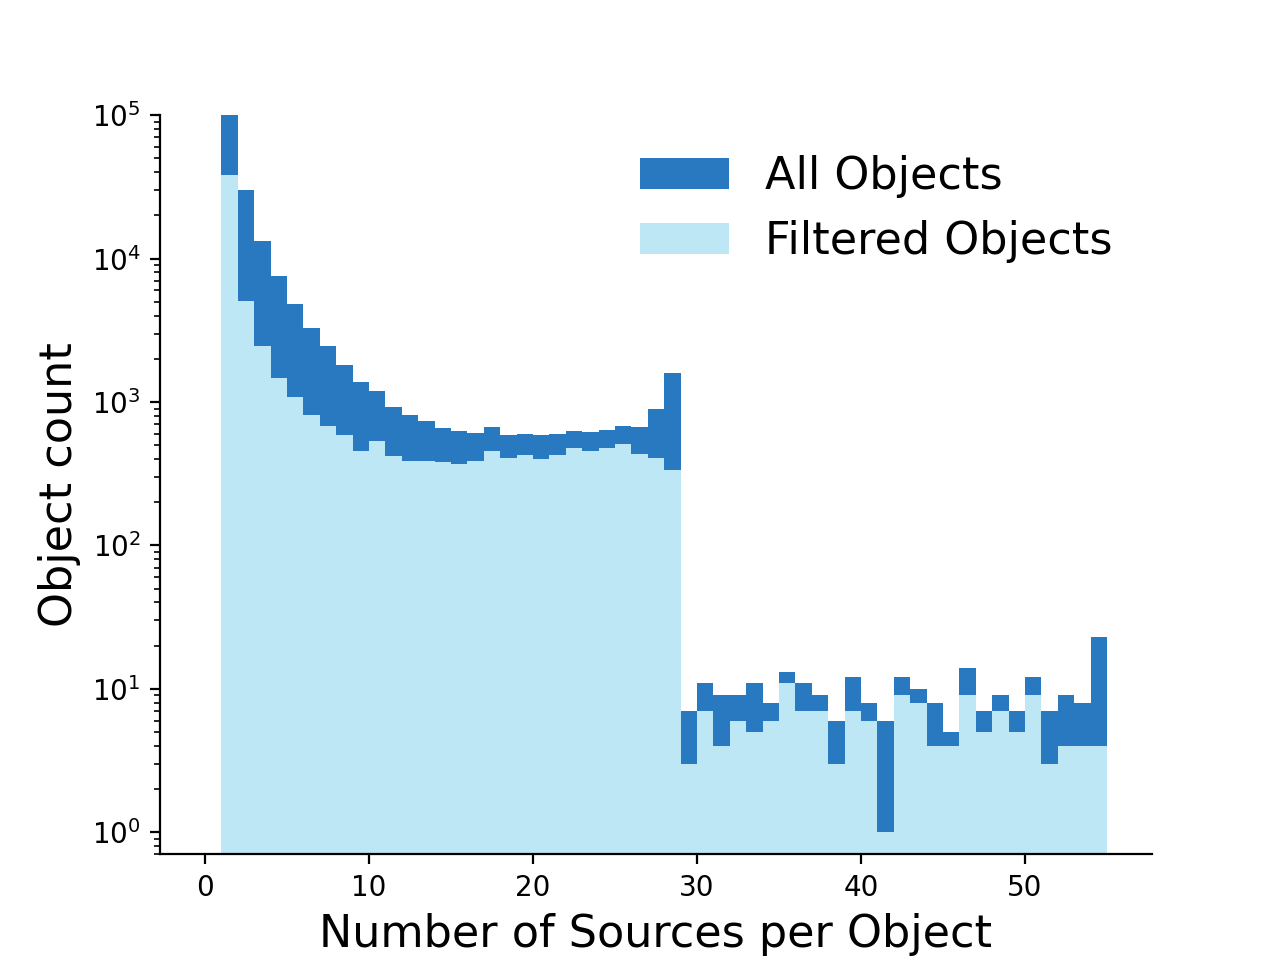

In [7]:
hist = doa.plotDiaObjectHistogram(objTable, goodObj)

<IPython.core.display.Javascript object>


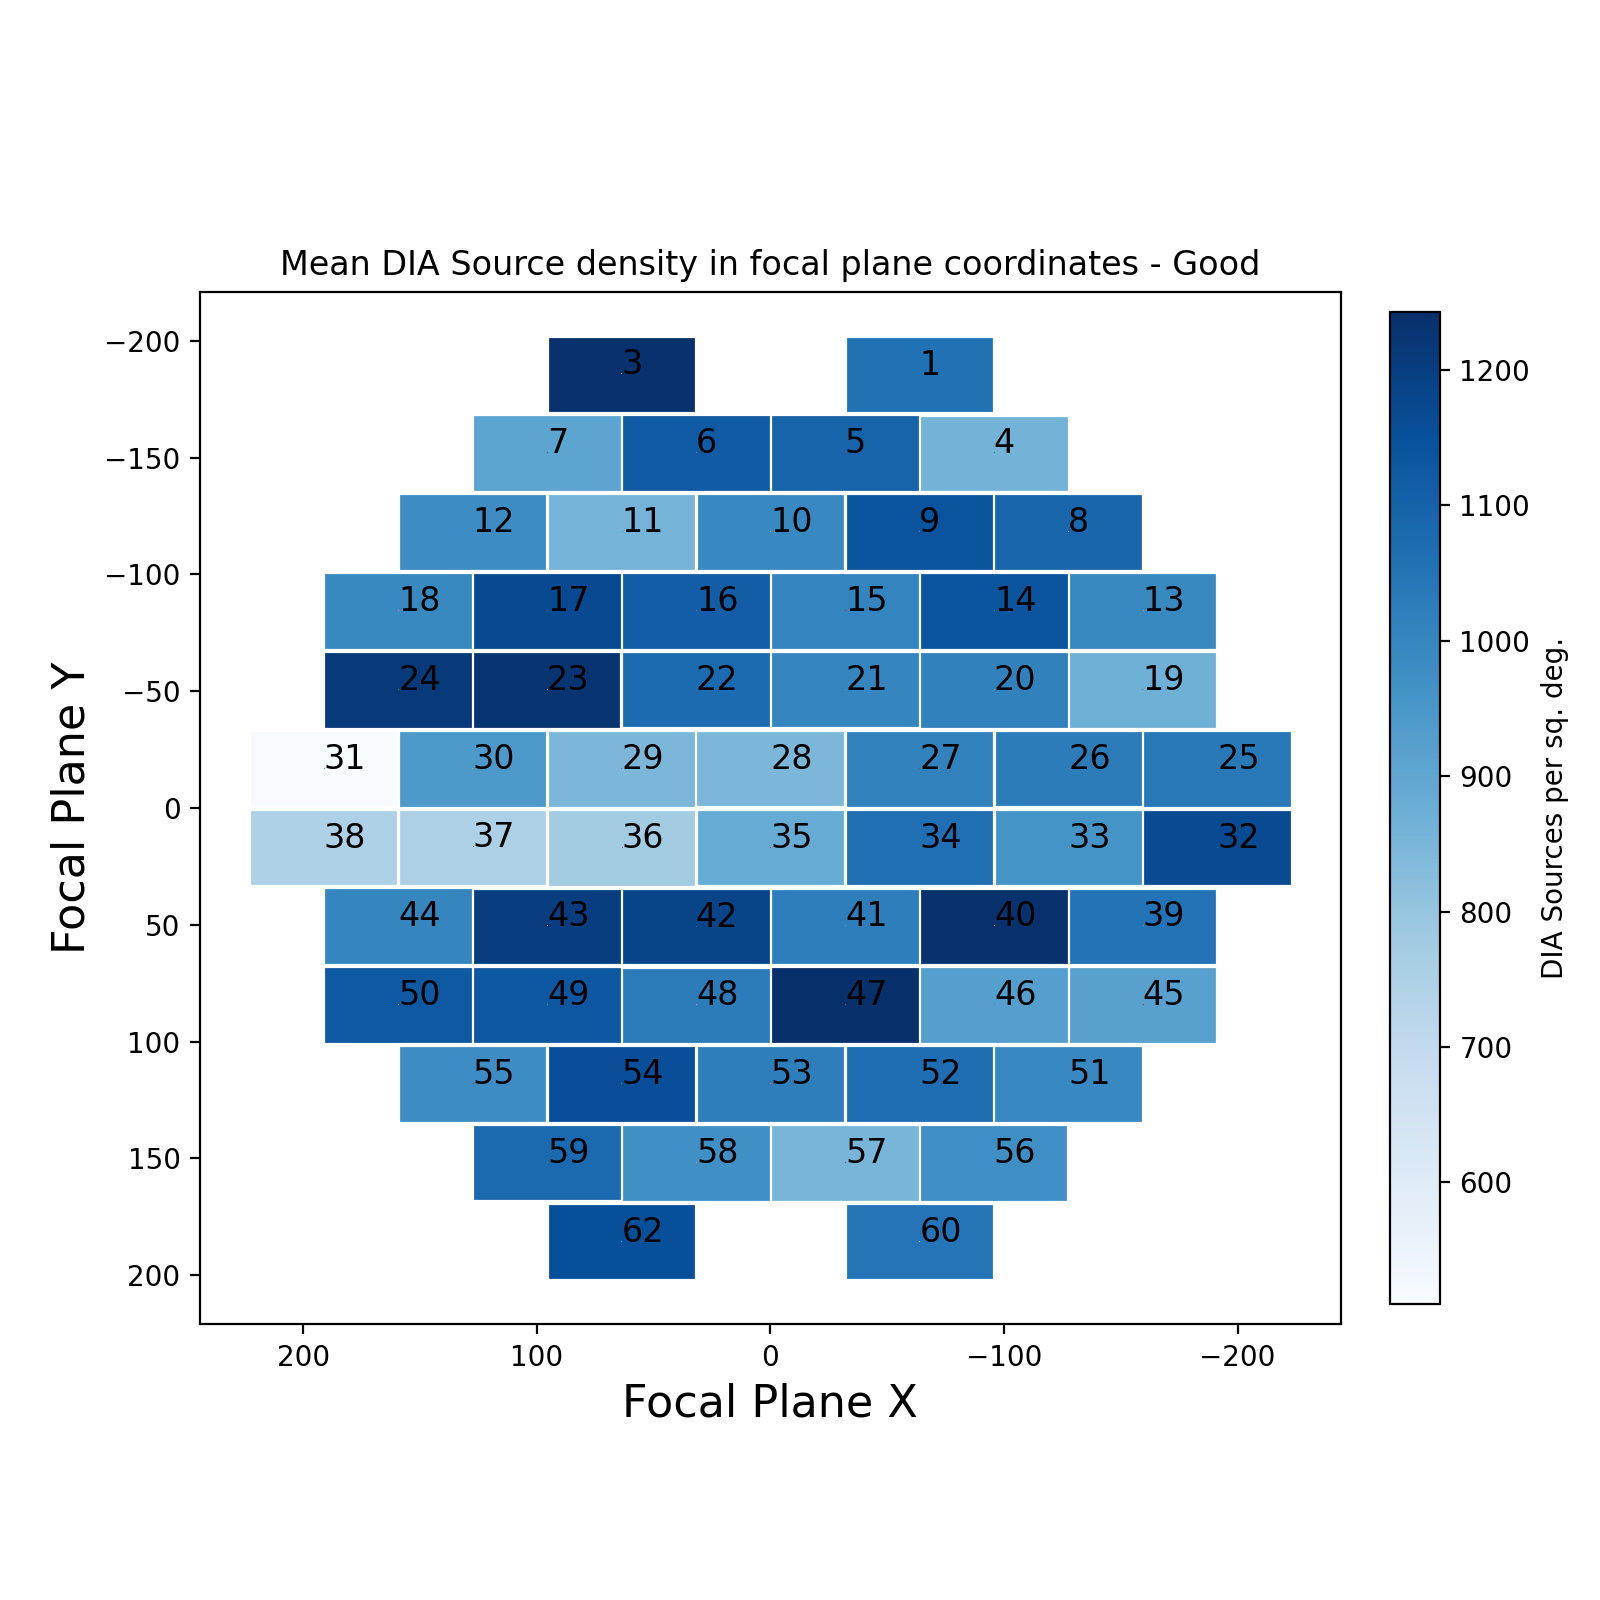

In [8]:
pla.plotDiaSourceDensityInFocalPlane(repo, goodSrc, title='- Good')

<IPython.core.display.Javascript object>


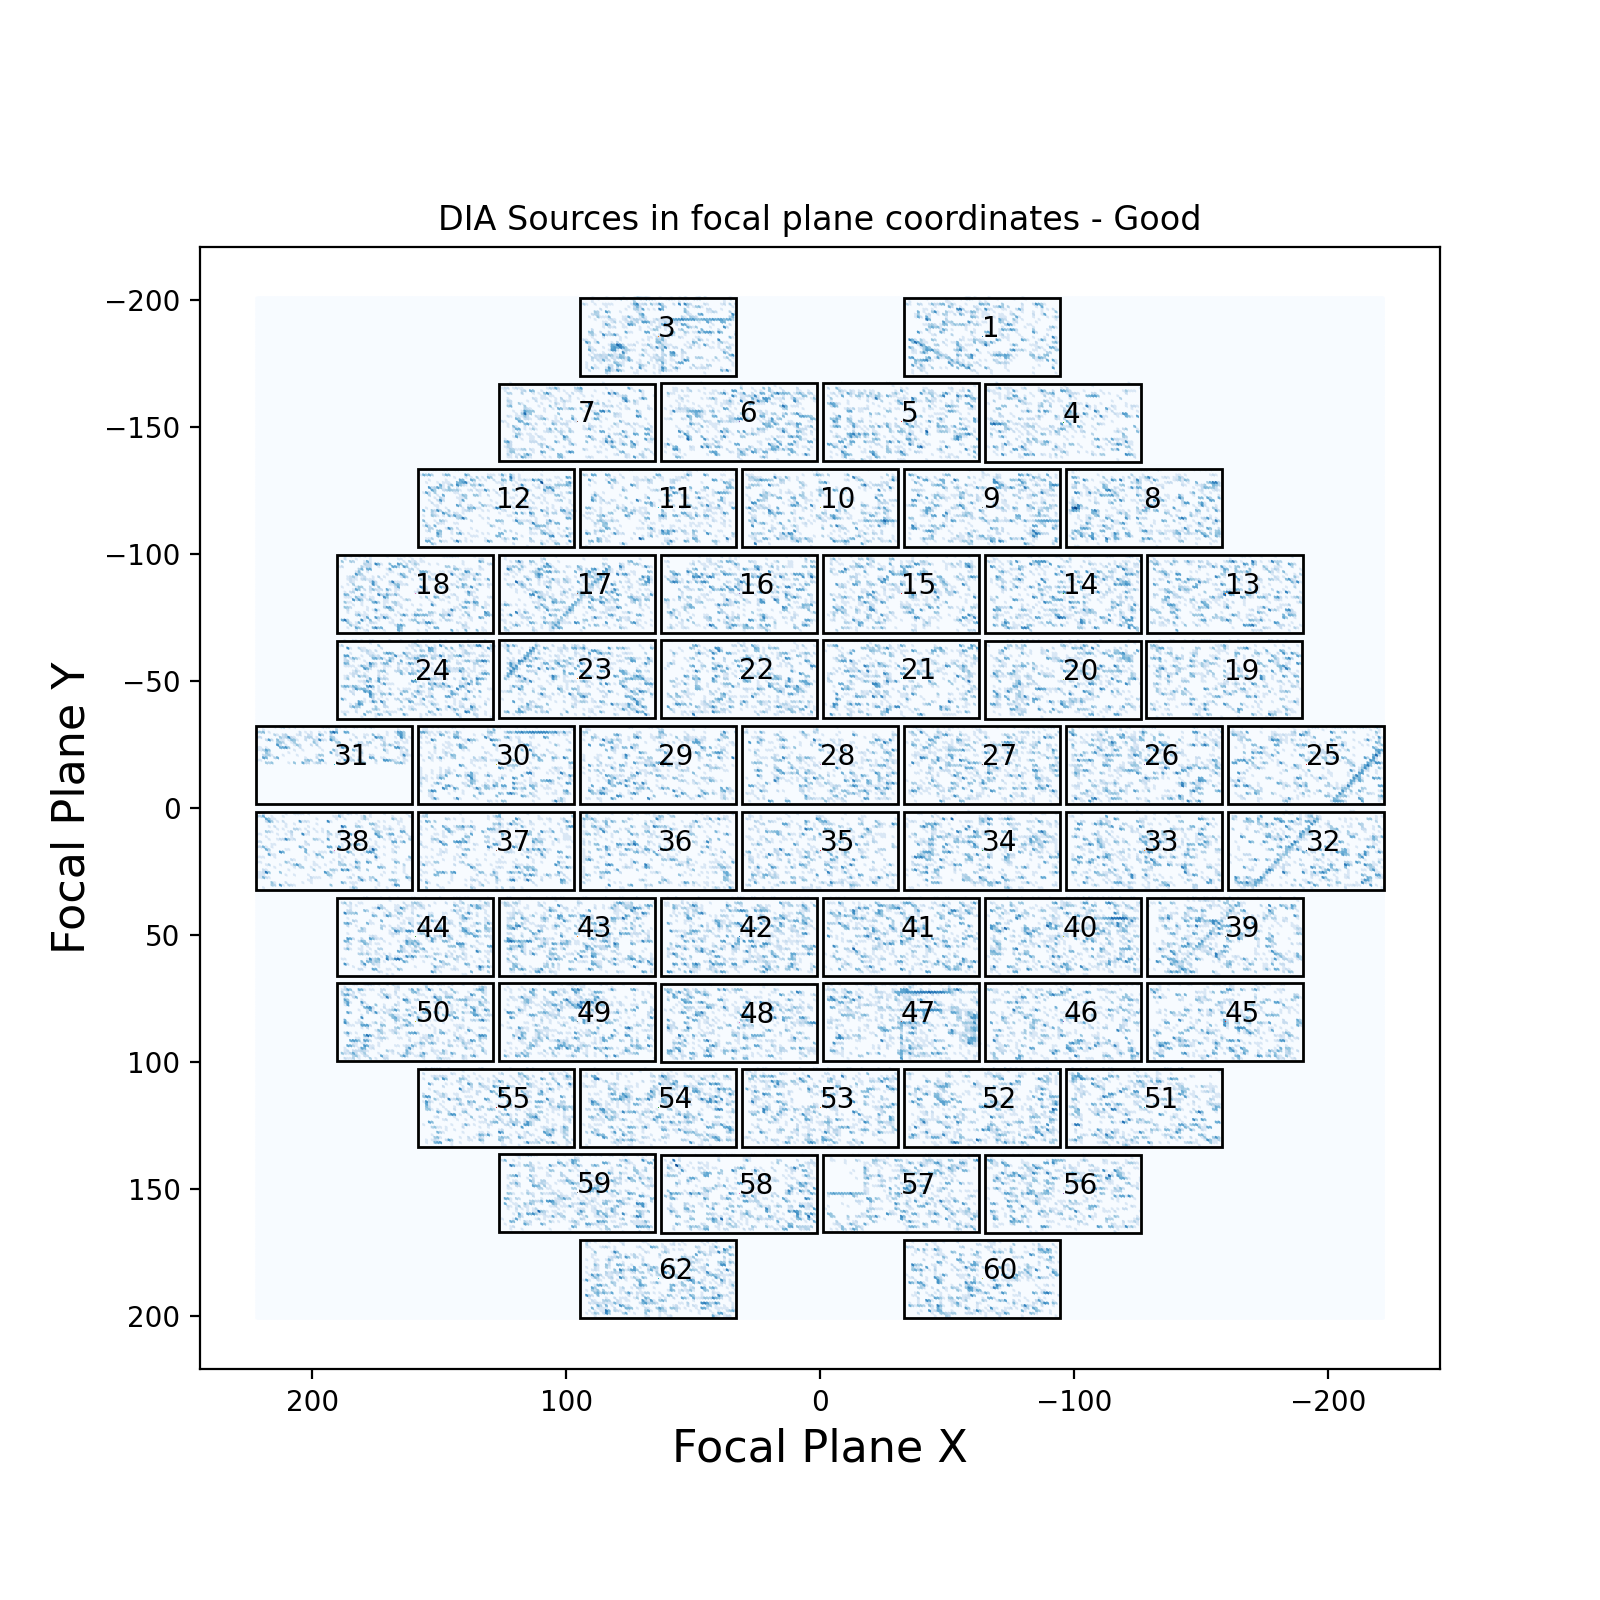

In [9]:
pla.plotDiaSourcesInFocalPlane(repo, goodSrc, title='- Good')

<IPython.core.display.Javascript object>


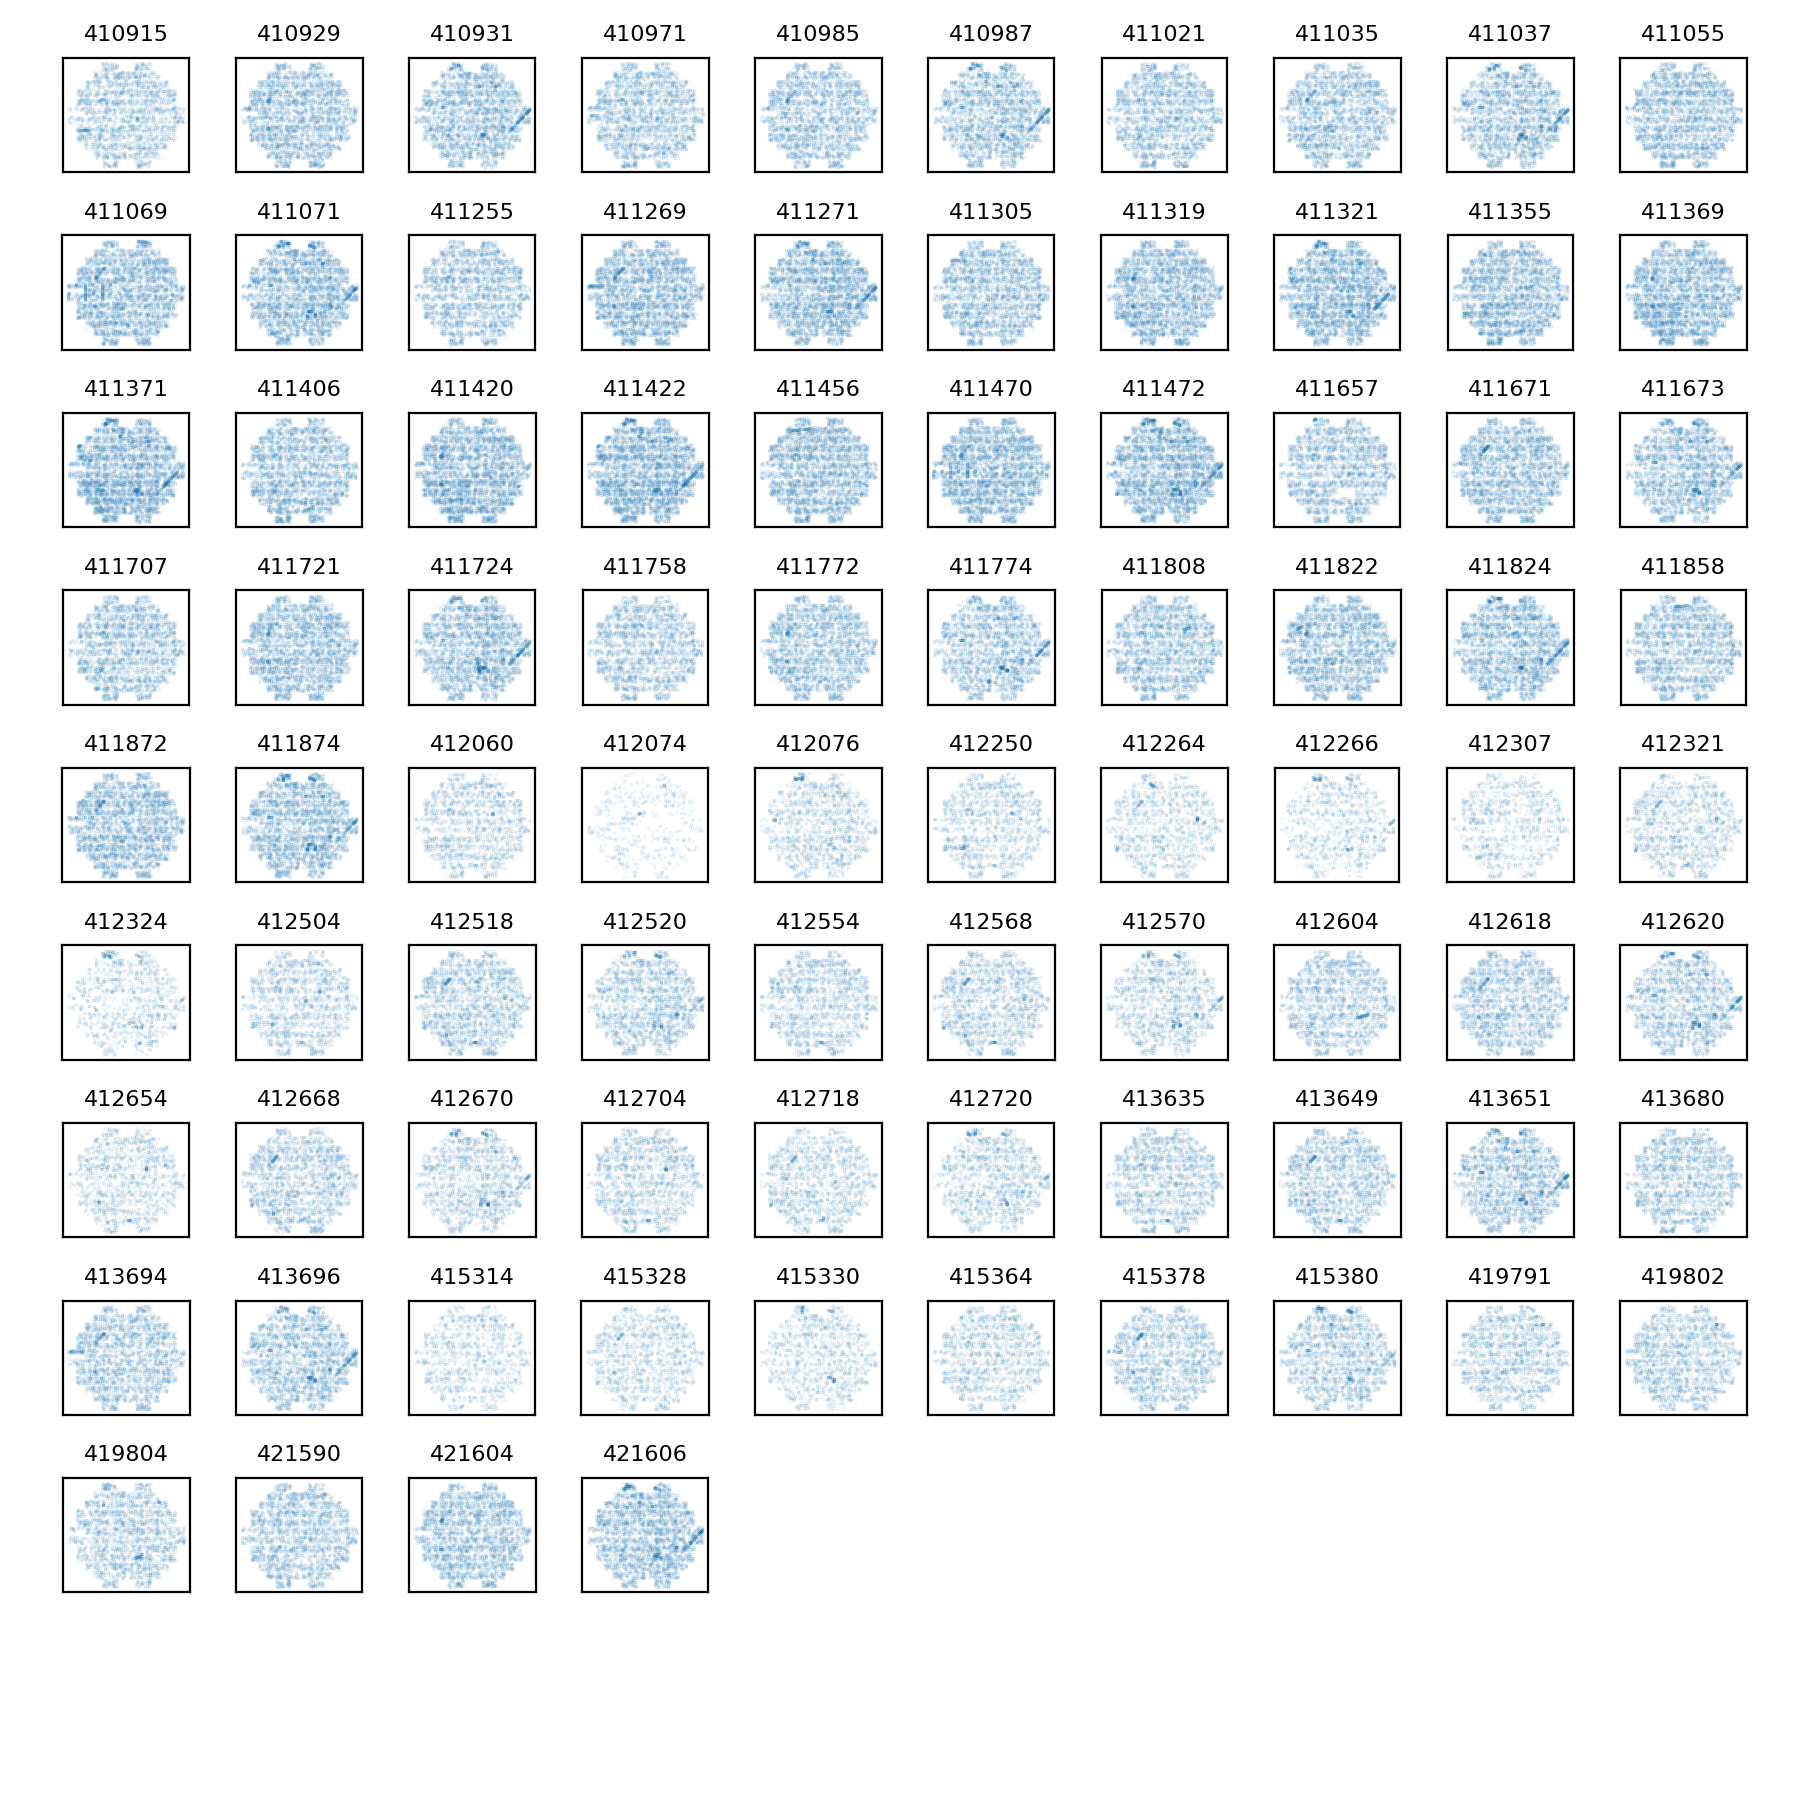

In [10]:
pla.plotDiaSourcesOnSkyGrid(repo, goodSrc)

In [11]:
def plotFluxHistSrc(srcTable1, srcTable2=None, fluxType='psFlux', label1=None, label2=None, title=None, ylog=False):
    plt.figure(figsize=(7, 5))
    plt.xlabel(fluxType, size=12)
    plt.ylabel('DIA Source count', size=12)
    #bins = np.concatenate((-1*np.flip(np.logspace(-1, 6, 50)), np.logspace(-1, 6, 50)))
    bins = np.linspace(-1e4, 1e4, 200)
    if ylog:
        plt.yscale('log')
    #plt.xscale('symlog')
    plt.hist(srcTable1[fluxType].values, bins=bins, color='#2979C1', label=label1)
    if srcTable2 is not None:
        plt.hist(srcTable2[fluxType].values, bins=bins, color='#Bee7F5', label=label2)
    if label1:
        plt.legend(frameon=False, fontsize=12)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title(title)

<IPython.core.display.Javascript object>


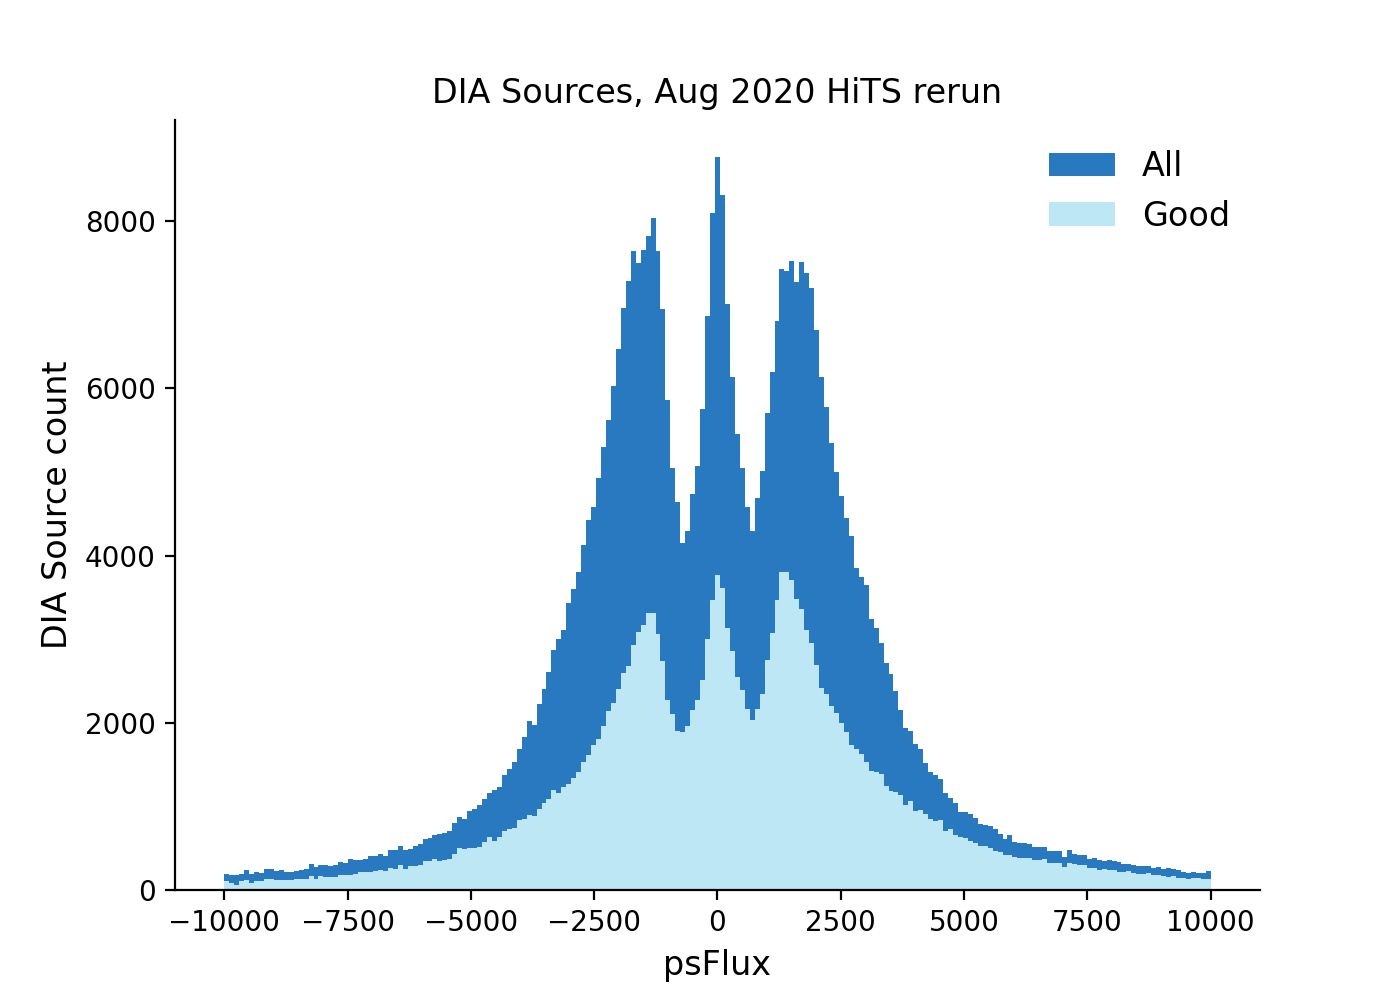

In [12]:
plotFluxHistSrc(srcTable, goodSrc, fluxType='psFlux', label1='All', label2='Good',
                title='DIA Sources, Aug 2020 HiTS rerun')

<IPython.core.display.Javascript object>


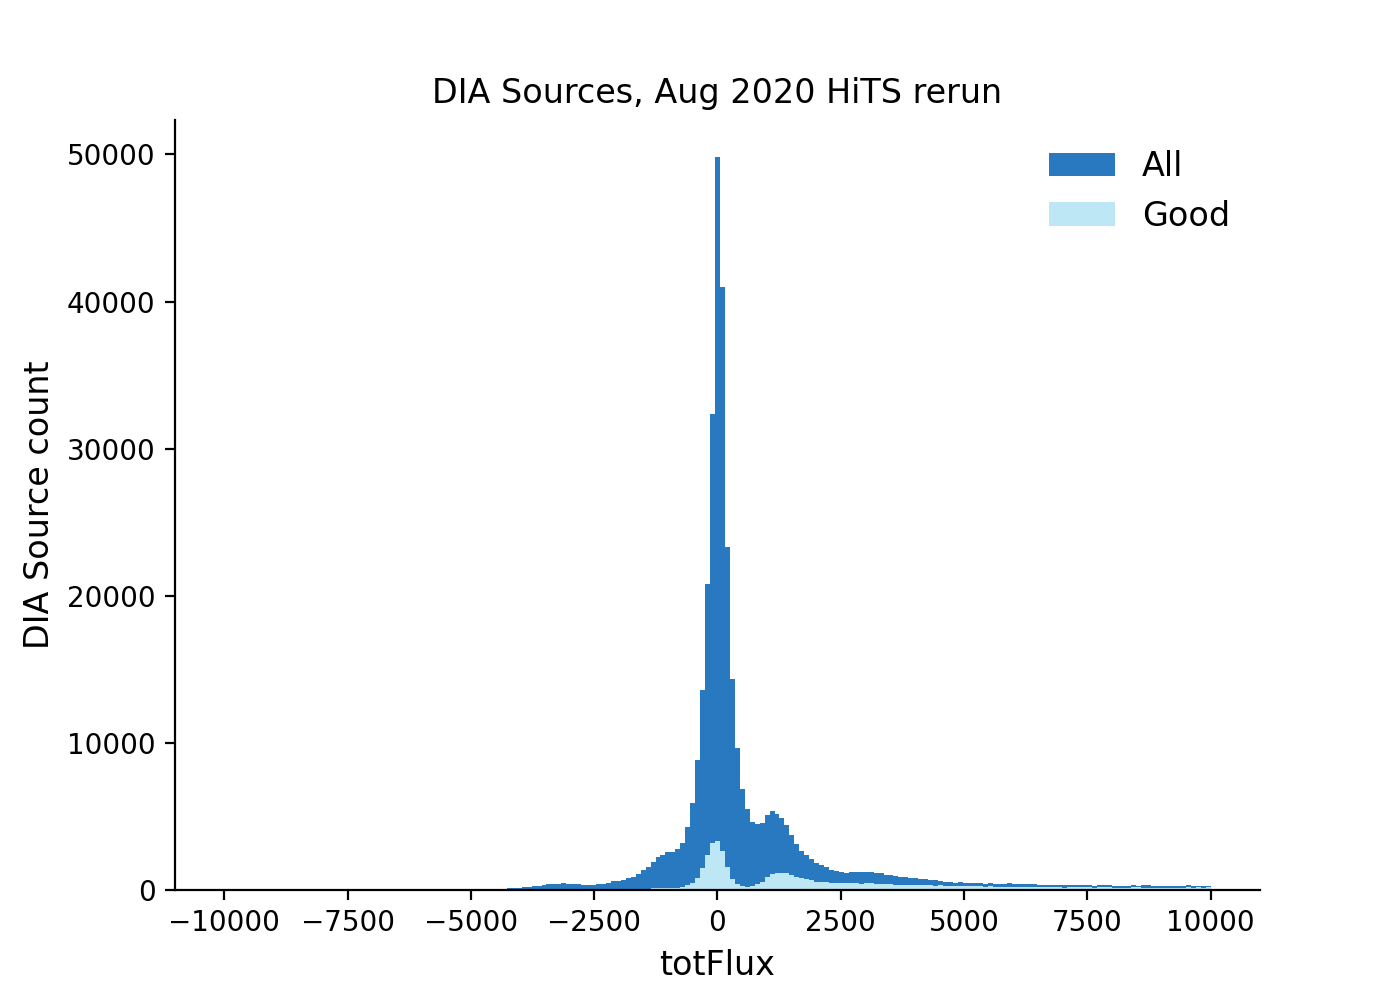

In [13]:
plotFluxHistSrc(srcTable, goodSrc, fluxType='totFlux', label1='All', label2='Good',
                title='DIA Sources, Aug 2020 HiTS rerun')

In [14]:
repo_old = '/project/mrawls/hits2015/rerun/cw_2020_07'
repo_older = '/project/mrawls/hits2015/rerun/cw_2020_06'

In [15]:
objTable_old, srcTable_old, goodObj_old, goodSrc_old = pla.loadTables(repo_old)
objTable_older, srcTable_older, goodObj_older, goodSrc_older = pla.loadTables(repo_older)

In [16]:
print(len(srcTable), len(srcTable_old), len(srcTable_older))
print(len(goodSrc), len(goodSrc_old), len(goodSrc_older))
print(len(objTable), len(objTable_old), len(objTable_older))
print(len(goodObj), len(goodObj_old), len(goodObj_older))

671170 671170 671170
229290 229290 229290
247550 247550 247550
59351 59352 59351


<IPython.core.display.Javascript object>


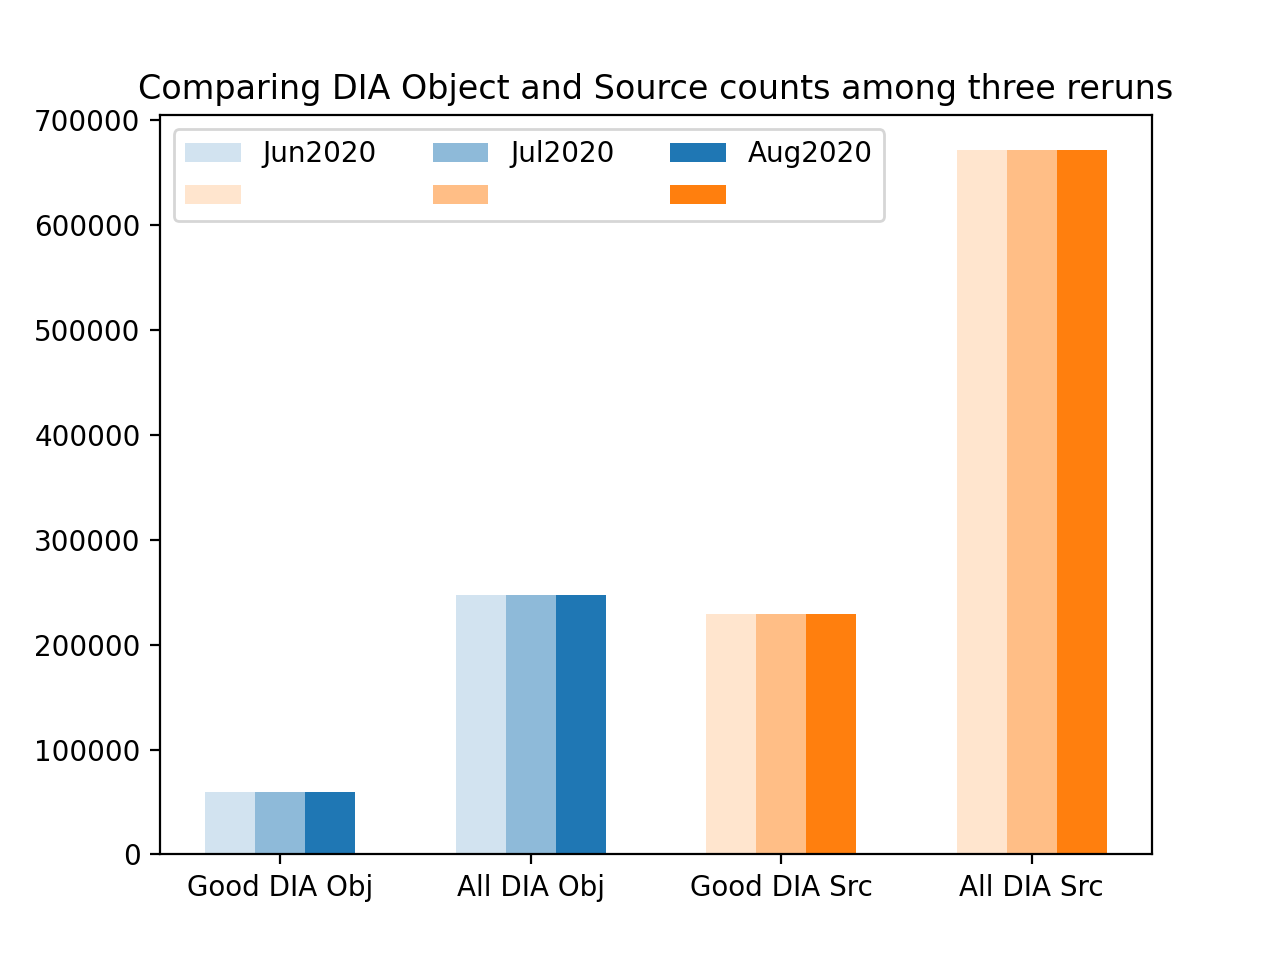

Text(0.5, 1.0, 'Comparing DIA Object and Source counts among three reruns')

In [17]:
srcTable3 = srcTable_older
goodSrc3 = goodSrc_older
objTable3 = objTable_older
goodObj3 = goodObj_older
label3 = "Jun2020"

srcTable1 = srcTable_old
goodSrc1 = goodSrc_old
objTable1 = objTable_old
goodObj1 = goodObj_old
label1 = "Jul2020"

srcTable2 = srcTable
goodSrc2 = goodSrc
objTable2 = objTable
goodObj2 = goodObj
label2 = "Aug2020"

fig, ax = plt.subplots()
barLabels = ['Good DIA Obj', 'All DIA Obj', 'Good DIA Src', 'All DIA Src']
xbar = np.array([0, 1])
width = 0.2

# June
ax.bar(xbar - width, [len(goodObj3), len(objTable3)], 
       width, label=label3, color='C0', alpha=0.2)
ax.bar(xbar + 2 - width, [len(goodSrc3), len(srcTable3)],
       width, label=' ', color='C1', alpha=0.2)

# July
ax.bar(xbar, [len(goodObj1), len(objTable1)], 
       width, label=label1, color='C0', alpha=0.5)
ax.bar(xbar + 2, [len(goodSrc1), len(srcTable1)],
       width, label=' ', color='C1', alpha=0.5)

# August
ax.bar(xbar + width, [len(goodObj2), len(objTable2)], 
       width, label=label2, color='C0')
ax.bar(xbar + 2 + width, [len(goodSrc2), len(srcTable2)],
       width, label=' ', color='C1')

plt.legend(ncol=3)
ax.set_xticks([0, 1, 2, 3])
labels = ax.set_xticklabels(barLabels)
plt.title('Comparing DIA Object and Source counts among three reruns')